# Basic Analysis for Best Scenarios

NOTE: I did a module called `MoTmo`, which is imported as `mo`.

Outline:
1. Get total emissions produced by the best scenario.
2. Get the contribution of emissions per region for this particular scenario.
3. Get the total emissions assuming the best scenarios per region.

Recall: The best scenario (overall) we got is 
<center>CH1SP1SE0WE1BP0RE1CO1DI1WO0CS0</center>

Which corresponds to 
- Charging infrastructure (CH)
- Public Transport Subsidy (SP)
- Car Weight regulation (WE)
- Urban Combustion Restrictions (RE)
- Higher Gas Price (CO)
- Intermodal Digitalisation (DI)

These are the best scenarios per region:

- {**CH1SP1SE0WE1BP0RE1CO0DI1WO1CS0**: ['Schleswig-Holstein',
   'Bremen',
   'Hamburg']},
- {**CH1SP1SE0WE1BP0RE1CO1DI1WO0CS0**: ['Nordrhein-Westfalen',
   'Saarland',
   'Bayern',
   'Mecklenburg-Vorpommern',
   'Brandenburg',
   'Niedersachsen']},
- {**CH0SP1SE0WE1BP0RE1CO1DI1WO0CS0**: ['Baden-Wurttemberg',
   'Hessen',
   'Thuringen',
   'Sachsen-Anhalt',
   'Sachsen']},
- {**CH0SP1SE0WE1BP0RE1CO0DI1WO0CS1**: ['Rheinland-Pfalz']},
- {**CH0SP1SE0WE0BP1RE1CO1DI0WO0CS0**: ['Berlin']}


The total emissions in the first scenario (best scenario overall) is **2.226839e+12**

In [1]:
import numpy as np
import pandas as pd
import MoTmo as mo

import datetime as dt
import time

import os
from os import listdir
from os.path import isfile,join
import matplotlib.pyplot as plt
from itertools import product

In [2]:
PATH = '/home/moni/Documents/motmo/timeSeries_files/' # original data
PATH2 = '/home/moni/Documents/motmo/data_without_hhID/' # folder in which we will store transformed data

In [3]:
region_ids = mo.get_region_ids()
# region_ids = [942, 1515, 1516, 1517, 1518, 1519, 1520, 2331, 2332, 2333, 2334, 2335, 2336, 3312, 3562, 6321]
region_ids

[942,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 2331,
 2332,
 2333,
 2334,
 2335,
 2336,
 3312,
 3562,
 6321]

In [6]:
f_names = mo.list_file_names()
str_names = mo.list_str_scenarios(f_names)
len(str_names)

540

In [7]:
dict_reg = mo.get_dict_regions()
dict_reg

{942: 'Schleswig-Holstein',
 1515: 'Nordrhein-Westfalen',
 1516: 'Baden-Wurttemberg',
 1517: 'Hessen',
 1518: 'Bremen',
 1519: 'Thuringen',
 1520: 'Hamburg',
 2331: 'Rheinland-Pfalz',
 2332: 'Saarland',
 2333: 'Bayern',
 2334: 'Berlin',
 2335: 'Sachsen-Anhalt',
 2336: 'Sachsen',
 3312: 'Mecklenburg-Vorpommern',
 3562: 'Brandenburg',
 6321: 'Niedersachsen'}

## Emissions per region of Best Overall Scenario

In [8]:
t_emi_region = mo.get_tot_emi_per_region('timeSeries_CH1SP1SE0WE1BP0RE1CO1DI1WO0CS0.csv')
t_emi_region

,region_name,total_emissions,proportion
942,Schleswig-Holstein,8.258518e+10,0.037086
1515,Nordrhein-Westfalen,4.663630e+11,0.209428
1516,Baden-Wurttemberg,2.912432e+11,0.130788
1517,Hessen,1.650632e+11,0.074124
1518,Bremen,1.456428e+10,0.006540
1519,Thuringen,7.734794e+10,0.034734
1520,Hamburg,3.316476e+10,0.014893
2331,Rheinland-Pfalz,1.115436e+11,0.050091
2332,Saarland,3.078091e+10,0.013823
2333,Bayern,3.341505e+11,0.150056


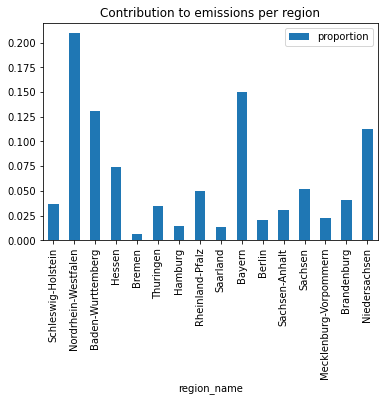

In [10]:
mo.get_contri_plot_emis_region(t_emi_region)

In [11]:
df_sc1 = mo.read_metrics_scenario('timeSeries_CH1SP1SE0WE1BP0RE1CO1DI1WO0CS0.csv') # best scenario
df_sc1 = df_sc1[df_sc1["step"]>=78]
df_sc1

,step,reID,region_name,emissions_C,emissions_E,emissions_N,emissions_P,emissions_S,stock_C,stock_E,stock_N,stock_P,stock_S,total_emissions
1248,78,942,Schleswig-Holstein,4.741672e+08,1.713170e+05,296.230052,1.972660e+07,1.772278e+05,38288,8,3713,4652,14,4.942426e+08
1249,78,1515,Nordrhein-Westfalen,2.672563e+09,1.697720e+06,2051.776461,1.816561e+08,2.153462e+06,223484,144,26219,43282,148,2.858073e+09
1250,78,1516,Baden-Wurttemberg,1.666924e+09,3.966197e+05,1373.715310,7.393931e+07,6.359605e+05,138316,28,17734,17652,48,1.741897e+09
1251,78,1517,Hessen,9.437972e+08,5.184352e+05,672.992112,4.985159e+07,7.873546e+05,78950,34,8406,11965,50,9.949552e+08
1252,78,1518,Bremen,8.352024e+07,2.923670e+04,41.872328,4.676150e+06,0.000000e+00,7424,3,573,1249,0,8.822566e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,180,2335,Sachsen-Anhalt,2.283143e+08,5.729797e+06,31.720780,5.342308e+07,5.297394e+05,24976,1198,354,14739,39,2.879969e+08
2892,180,2336,Sachsen,3.674685e+08,1.834862e+07,63.170512,9.324253e+07,7.743825e+05,38513,4011,749,25613,47,4.798341e+08
2893,180,3312,Mecklenburg-Vorpommern,1.729414e+08,3.883097e+06,25.425878,3.729927e+07,1.807554e+05,17739,780,256,9842,18,2.143045e+08
2894,180,3562,Brandenburg,2.883453e+08,3.369907e+07,67.388864,5.823816e+07,2.005809e+07,25541,6462,748,13688,2334,4.003406e+08


In [12]:
stockRC_df = mo.timeStep_stock_emissions_returns(df_sc1).fillna(0) #rate of change sotck_X
# change_stock_df[change_stock_df['reID']==942]
stockRC_df#.groupby(['step']).sum().reset_index()

/home/moni/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/home/moni/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,step,reID,region_name,change_stock_C,change_stock_E,change_stock_N,change_stock_P,change_stock_S,change_total_emissions
1248,78,942,Schleswig-Holstein,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1249,78,1515,Nordrhein-Westfalen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1250,78,1516,Baden-Wurttemberg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1251,78,1517,Hessen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1252,78,1518,Bremen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2891,180,2335,Sachsen-Anhalt,-0.011321,0.070599,-0.005618,0.014384,0.000000,-0.006189
2892,180,2336,Sachsen,-0.012158,0.055804,-0.018349,0.010893,0.000000,-0.006370
2893,180,3312,Mecklenburg-Vorpommern,-0.010045,0.067031,-0.011583,0.013803,0.000000,-0.005278
2894,180,3562,Brandenburg,-0.008078,0.015080,-0.013193,0.003298,0.034116,-0.003102


In [13]:
stepDates_dict = mo.get_dict_steps_dates()
stepDates_dict

{0: 'Jan-2005',
 1: 'Mar-2005',
 2: 'May-2005',
 3: 'Jul-2005',
 4: 'Sep-2005',
 5: 'Nov-2005',
 6: 'Jan-2006',
 7: 'Mar-2006',
 8: 'May-2006',
 9: 'Jul-2006',
 10: 'Sep-2006',
 11: 'Nov-2006',
 12: 'Jan-2007',
 13: 'Mar-2007',
 14: 'May-2007',
 15: 'Jul-2007',
 16: 'Sep-2007',
 17: 'Nov-2007',
 18: 'Jan-2008',
 19: 'Mar-2008',
 20: 'May-2008',
 21: 'Jul-2008',
 22: 'Sep-2008',
 23: 'Nov-2008',
 24: 'Jan-2009',
 25: 'Mar-2009',
 26: 'May-2009',
 27: 'Jul-2009',
 28: 'Sep-2009',
 29: 'Nov-2009',
 30: 'Jan-2010',
 31: 'Mar-2010',
 32: 'May-2010',
 33: 'Jul-2010',
 34: 'Sep-2010',
 35: 'Nov-2010',
 36: 'Jan-2011',
 37: 'Mar-2011',
 38: 'May-2011',
 39: 'Jul-2011',
 40: 'Sep-2011',
 41: 'Nov-2011',
 42: 'Jan-2012',
 43: 'Mar-2012',
 44: 'May-2012',
 45: 'Jul-2012',
 46: 'Sep-2012',
 47: 'Nov-2012',
 48: 'Jan-2013',
 49: 'Mar-2013',
 50: 'May-2013',
 51: 'Jul-2013',
 52: 'Sep-2013',
 53: 'Nov-2013',
 54: 'Jan-2014',
 55: 'Mar-2014',
 56: 'May-2014',
 57: 'Jul-2014',
 58: 'Sep-2014',
 59: 'N

In [14]:
def get_df_plot_regions(df,var_name):
    df2 = mo.timeStep_stock_emissions_returns(df)
    dates_string = list(mo.get_dict_steps_dates().values())
    df_plot = df2[['step','region_name',var_name]].pivot(index='step', columns='region_name', values=var_name).reset_index()
    df_plot['step'] = dates_string
    return df_plot

In [15]:
stockRC_df

,step,reID,region_name,change_stock_C,change_stock_E,change_stock_N,change_stock_P,change_stock_S,change_total_emissions
1248,78,942,Schleswig-Holstein,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1249,78,1515,Nordrhein-Westfalen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1250,78,1516,Baden-Wurttemberg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1251,78,1517,Hessen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1252,78,1518,Bremen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2891,180,2335,Sachsen-Anhalt,-0.011321,0.070599,-0.005618,0.014384,0.000000,-0.006189
2892,180,2336,Sachsen,-0.012158,0.055804,-0.018349,0.010893,0.000000,-0.006370
2893,180,3312,Mecklenburg-Vorpommern,-0.010045,0.067031,-0.011583,0.013803,0.000000,-0.005278
2894,180,3562,Brandenburg,-0.008078,0.015080,-0.013193,0.003298,0.034116,-0.003102


In [62]:
df_plot_reg = mo.get_df_plot_regions(df = df_best,start_step=78,var_name = 'change_total_emissions')
df_plot_reg
# mo.read_metrics_scenario(2,3)
# mo.get_rate_change_region(test_e,942)
# mo.suma(2,3)

/home/moni/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/home/moni/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


region_name,step,Baden-Wurttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thuringen
0,Jan-2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Mar-2018,0.001701,0.001671,0.011056,-0.001304,0.001859,0.003113,0.001881,0.001382,0.001388,0.002259,0.001623,0.001558,0.001545,0.000236,0.001786,0.000551
2,May-2018,-0.000978,-0.001046,-0.003477,-0.003034,-0.000748,-0.000610,-0.000861,-0.001938,-0.000980,-0.001066,-0.000558,-0.000787,-0.001188,-0.001465,-0.001250,-0.001287
3,Jul-2018,-0.001270,-0.001399,-0.004514,-0.002609,-0.001205,-0.001711,-0.001463,-0.001539,-0.001444,-0.001507,-0.001450,-0.001016,-0.001722,-0.001787,-0.001635,-0.001673
4,Sep-2018,-0.001381,-0.001659,-0.003183,-0.002395,-0.002540,-0.002372,-0.001556,-0.002134,-0.001570,-0.001688,-0.001313,-0.001585,-0.001887,-0.002304,-0.002056,-0.001834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,May-2034,-0.004555,-0.003409,0.005418,-0.003118,-0.012164,-0.005527,-0.005725,-0.004647,-0.004374,-0.005484,-0.004366,-0.004963,-0.005417,-0.005116,-0.004968,-0.004894
99,Jul-2034,-0.005101,-0.003702,0.005556,-0.002748,-0.010220,-0.005734,-0.005699,-0.005714,-0.004963,-0.005757,-0.004177,-0.006688,-0.006132,-0.004598,-0.006136,-0.004422
100,Sep-2034,-0.005098,-0.003417,0.005117,-0.002640,-0.011917,-0.006376,-0.005350,-0.005253,-0.005447,-0.006164,-0.004951,-0.007387,-0.006866,-0.006269,-0.004681,-0.005304
101,Nov-2034,-0.005026,-0.003772,0.005686,-0.003546,-0.012052,-0.005885,-0.005262,-0.005086,-0.004982,-0.005899,-0.005086,-0.004468,-0.006340,-0.004738,-0.005442,-0.005660


In [19]:
get_df_emi_change_global(df_plot)
mo.get_dict_regions()

NameError: name 'get_df_emi_change_global' is not defined

<Figure size 432x288 with 0 Axes>

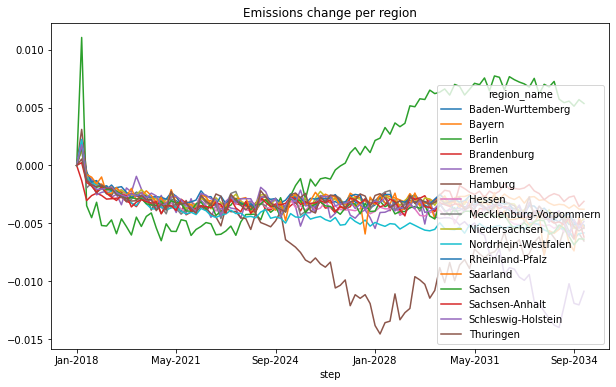

In [65]:
plt.figure()
# tDf=trans_df(scom_df)
fig = df_plot_reg.plot(figsize=(10,6), title = "Emissions change per region", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

In [39]:
df_best = mo.read_metrics_scenario('timeSeries_CH1SP1SE0WE1BP0RE1CO1DI1WO0CS0.csv') # best scenario
df_best = df_best[df_best["step"]>=78]
emi_best = mo.get_df_emi_change_global(df_best)

df_sc1 = mo.read_metrics_scenario('timeSeries_CH1SP1SE0WE0BP0RE0CO1DI1WO0CS0.csv') # best scenario
df_sc1 = df_sc1[df_sc1["step"]>=78]
emi_sc1 = mo.get_df_emi_change_global(df_sc1)

df_sc2 = mo.read_metrics_scenario('timeSeries_CH1SP1SE0WE1BP0RE0CO1DI1WO0CS0.csv') # best scenario
df_sc2 = df_sc2[df_sc2["step"]>=78]
emi_sc2 = mo.get_df_emi_change_global(df_sc2)

df_sc3 = mo.read_metrics_scenario('timeSeries_CH1SP1SE0WE0BP0RE1CO1DI1WO0CS0.csv') # best scenario
df_sc3 = df_sc3[df_sc3["step"]>=78]
emi_sc3 = mo.get_df_emi_change_global(df_sc3)

df_sc4 = mo.read_metrics_scenario('timeSeries_CH1SP0SE0WE1BP0RE1CO1DI1WO0CS0.csv') # best scenario
df_sc4 = df_sc4[df_sc4["step"]>=78]
emi_sc4 = mo.get_df_emi_change_global(df_sc4)

df_compare_scen = pd.DataFrame(columns=['option','best_scenario','scenario1','scenario2','scenario3','scenario4'])
df_compare_scen['option']=['CH','SP','SE','WE','BP','RE','CO','DI','WO','CS']
df_compare_scen['best_scenario']=[1,1,0,1,0,1,1,1,0,0]
df_compare_scen['scenario1']=[1,1,0,0,0,0,1,1,0,0]
df_compare_scen['scenario2']=[1,1,0,1,0,0,1,1,0,0]
df_compare_scen['scenario3']=[1,1,0,0,0,1,1,1,0,0]
df_compare_scen['scenario4']=[0,0,0,1,0,1,1,1,0,0]
df_compare_scen


,step,change_total_emissions
0,78,0.000000
1,79,0.032304
2,80,-0.021272
3,81,-0.027944
4,82,-0.031458
...,...,...
98,176,-0.073309
99,177,-0.076236
100,178,-0.082002
101,179,-0.077559


In [36]:
emi_all = pd.DataFrame(columns=['step','best_scenario','scenario1','scenario2','scenario3','scenario4'])
emi_all['step'] = emi_sc4['step']
emi_all['best_scenario']=emi_best['change_total_emissions']
emi_all['scenario1']=emi_sc1['change_total_emissions']
emi_all['scenario2']=emi_sc2['change_total_emissions']
emi_all['scenario3']=emi_sc3['change_total_emissions']
emi_all['scenario4']=emi_sc4['change_total_emissions']
emi_all

,step,best_scenario,scenario1,scenario2,scenario3,scenario4
0,78,0.000000,0.000000,0.000000,0.000000,0.000000
1,79,0.032304,0.057320,0.042868,0.042222,-0.023100
2,80,-0.021272,0.007105,-0.010131,0.000888,-0.028696
3,81,-0.027944,0.003396,-0.016503,-0.002998,-0.031987
4,82,-0.031458,0.000179,-0.023122,-0.009737,-0.034468
...,...,...,...,...,...,...
98,176,-0.073309,-0.023393,-0.044026,-0.045637,-0.067702
99,177,-0.076236,-0.022557,-0.045112,-0.048111,-0.068489
100,178,-0.082002,-0.025669,-0.046972,-0.046470,-0.067993
101,179,-0.077559,-0.022299,-0.050608,-0.050001,-0.071422


<Figure size 432x288 with 0 Axes>

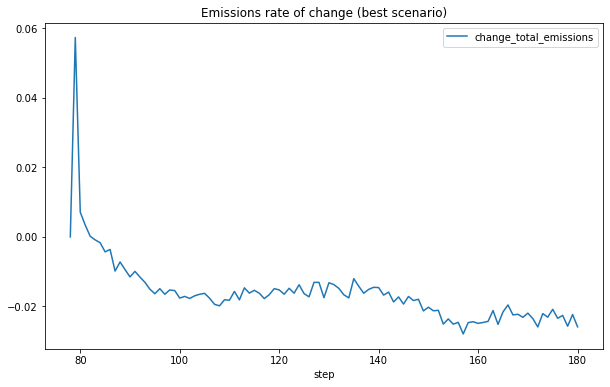

In [37]:
plt.figure()
# tDf=trans_df(scom_df)
fig = emi_sc1.plot(figsize=(10,6), title = "Emissions rate of change (best scenario)", x = 'step', y = 'change_total_emissions')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

<Figure size 432x288 with 0 Axes>

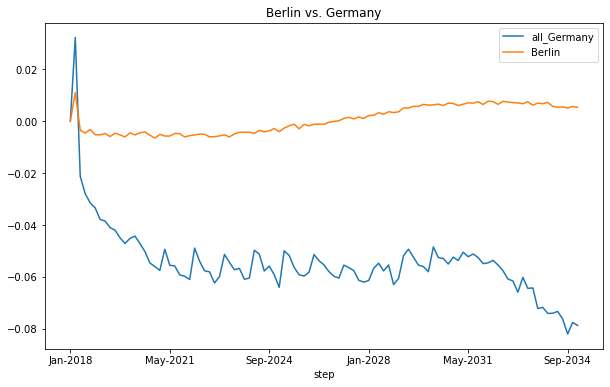

In [64]:
ber_df = pd.DataFrame(columns=['step','all_Germany','Berlin'])
ber_df['step'] = df_plot_reg['step']
ber_df['all_Germany'] = emi_best['change_total_emissions']
ber_df['Berlin'] = df_plot_reg['Berlin']
plt.figure()
# tDf=trans_df(scom_df)
fig = ber_df.plot(figsize=(10,6), title = "Berlin vs. Germany", x = 'step')

fig.axes.title.set_size(12)

<Figure size 432x288 with 0 Axes>

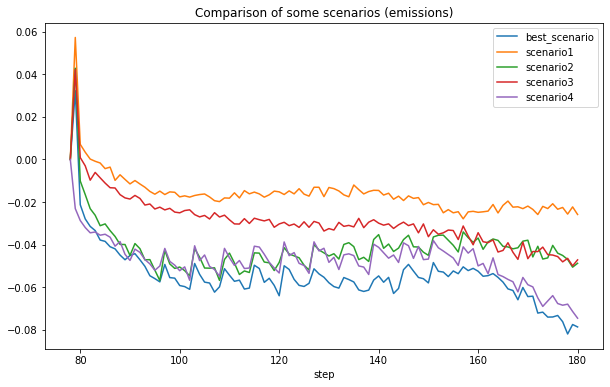

In [38]:
plt.figure()
# tDf=trans_df(scom_df)
fig = emi_all.plot(figsize=(10,6), title = "Comparison of some scenarios (emissions)", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

## Comparison little changes best scenario
We take some samples of the input space very similar and see what happens (this is what was done for the previous plot), but this time we iwll do it for mobility choices.

In [42]:
stock_best = mo.timeStep_stock_emissions_returns(df_best).fillna(0).groupby(['step']).sum().reset_index().drop(['reID','change_total_emissions'], axis=1)
stock_sc1 = mo.timeStep_stock_emissions_returns(df_sc1).fillna(0).groupby(['step']).sum().reset_index().drop(['reID','change_total_emissions'], axis=1)
stock_sc2 = mo.timeStep_stock_emissions_returns(df_sc2).fillna(0).groupby(['step']).sum().reset_index().drop(['reID','change_total_emissions'], axis=1)
stock_sc3 = mo.timeStep_stock_emissions_returns(df_sc3).fillna(0).groupby(['step']).sum().reset_index().drop(['reID','change_total_emissions'], axis=1)
stock_sc4 = mo.timeStep_stock_emissions_returns(df_sc4).fillna(0).groupby(['step']).sum().reset_index().drop(['reID','change_total_emissions'], axis=1)
stock_C = pd.DataFrame(columns=['step','best_scenario','scenario1','scenario2','scenario3','scenario4'])
stock_E = pd.DataFrame(columns=['step','best_scenario','scenario1','scenario2','scenario3','scenario4'])
stock_N = pd.DataFrame(columns=['step','best_scenario','scenario1','scenario2','scenario3','scenario4'])
stock_P = pd.DataFrame(columns=['step','best_scenario','scenario1','scenario2','scenario3','scenario4'])
stock_S = pd.DataFrame(columns=['step','best_scenario','scenario1','scenario2','scenario3','scenario4'])
stock_C['step']=stock_sc1['step']
stock_C['best_scenario']=stock_best['change_stock_C']
stock_C['scenario1']=stock_sc1['change_stock_C']
stock_C['scenario2']=stock_sc2['change_stock_C']
stock_C['scenario3']=stock_sc3['change_stock_C']
stock_C['scenario4']=stock_sc4['change_stock_C']
#--- E ---
stock_E['step']=stock_sc1['step']
stock_E['best_scenario']=stock_best['change_stock_E']
stock_E['scenario1']=stock_sc1['change_stock_E']
stock_E['scenario2']=stock_sc2['change_stock_E']
stock_E['scenario3']=stock_sc3['change_stock_E']
stock_E['scenario4']=stock_sc4['change_stock_E']
#--- N ---
stock_N['step']=stock_sc1['step']
stock_N['best_scenario']=stock_best['change_stock_N']
stock_N['scenario1']=stock_sc1['change_stock_N']
stock_N['scenario2']=stock_sc2['change_stock_N']
stock_N['scenario3']=stock_sc3['change_stock_N']
stock_N['scenario4']=stock_sc4['change_stock_N']
#--- P ---
stock_P['step']=stock_sc1['step']
stock_P['best_scenario']=stock_best['change_stock_P']
stock_P['scenario1']=stock_sc1['change_stock_P']
stock_P['scenario2']=stock_sc2['change_stock_P']
stock_P['scenario3']=stock_sc3['change_stock_P']
stock_P['scenario4']=stock_sc4['change_stock_P']
#--- S ---
stock_S['step']=stock_sc1['step']
stock_S['best_scenario']=stock_best['change_stock_S']
stock_S['scenario1']=stock_sc1['change_stock_S']
stock_S['scenario2']=stock_sc2['change_stock_S']
stock_S['scenario3']=stock_sc3['change_stock_S']
stock_S['scenario4']=stock_sc4['change_stock_S']
stock_C

/home/moni/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/home/moni/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,step,best_scenario,scenario1,scenario2,scenario3,scenario4
0,78,0.000000,0.000000,0.000000,0.000000,0.000000
1,79,-0.039390,-0.006231,-0.008161,-0.039096,-0.019990
2,80,-0.024597,-0.003678,0.002783,-0.023265,-0.010634
3,81,-0.022885,-0.003713,-0.001675,-0.022610,-0.008361
4,82,-0.020651,-0.004580,-0.004790,-0.023622,-0.012698
...,...,...,...,...,...,...
98,176,-0.233863,-0.136015,-0.147708,-0.233294,-0.226693
99,177,-0.242504,-0.126240,-0.142785,-0.224174,-0.248062
100,178,-0.255432,-0.150703,-0.153924,-0.233657,-0.234687
101,179,-0.284710,-0.137267,-0.165687,-0.242585,-0.262385


### Combustion Plot

<Figure size 432x288 with 0 Axes>

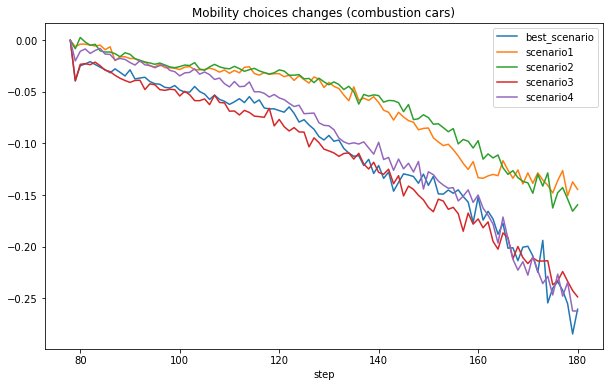

In [52]:
plt.figure()
# tDf=trans_df(scom_df)
fig = stock_C.plot(figsize=(10,6), title = "Mobility choices changes (combustion cars)", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

<Figure size 432x288 with 0 Axes>

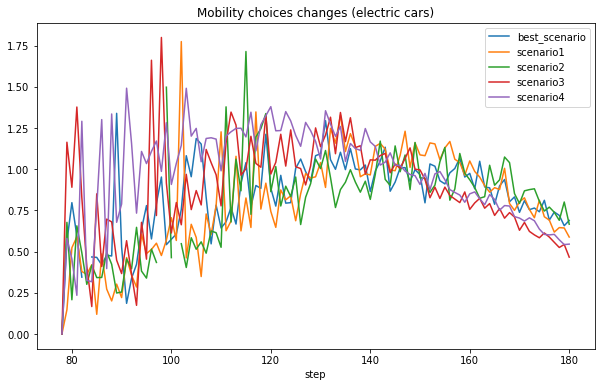

In [51]:
plt.figure()
# tDf=trans_df(scom_df)
fig = stock_E.plot(figsize=(10,6), title = "Mobility choices changes (electric cars)", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \ Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

<Figure size 432x288 with 0 Axes>

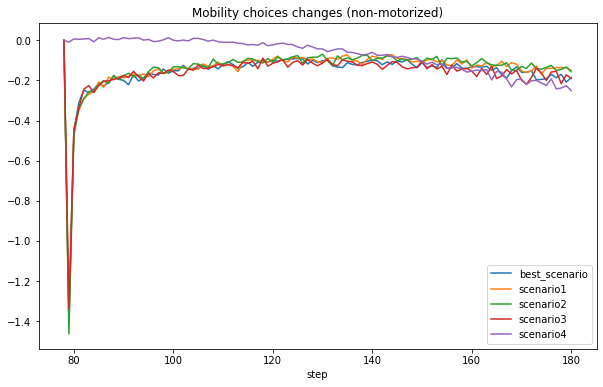

In [48]:
plt.figure()
# tDf=trans_df(scom_df)
fig = stock_N.plot(figsize=(10,6), title = "Mobility choices changes (non-motorized)", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

<Figure size 432x288 with 0 Axes>

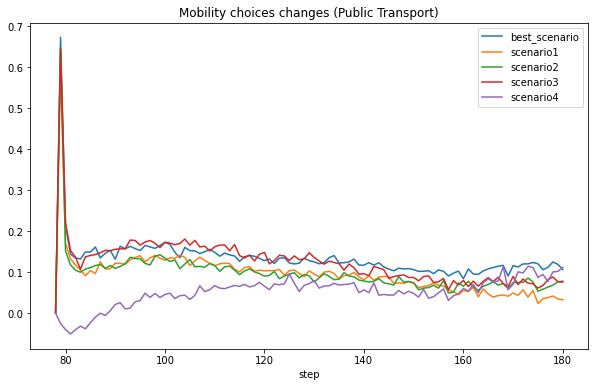

In [50]:
plt.figure()
# tDf=trans_df(scom_df)
fig = stock_P.plot(figsize=(10,6), title = "Mobility choices changes (Public Transport)", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

<Figure size 432x288 with 0 Axes>

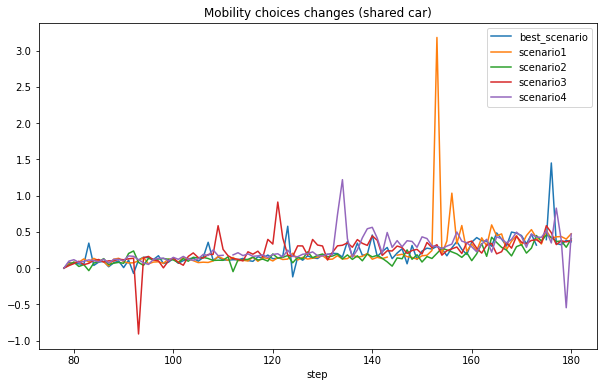

In [49]:
plt.figure()
# tDf=trans_df(scom_df)
fig = stock_S.plot(figsize=(10,6), title = "Mobility choices changes (shared car)", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

## Plot Stock Development Best scenario

In [ ]:
df_stock = change_stock_df.groupby(['step']).sum().reset_index().drop(['reID','change_total_emissions'], axis=1)
df_stock = df_stock.rename(columns={"change_stock_C": "Combustion", "change_stock_E": "Electric",
                         "change_stock_P": "Public_transport", "change_stock_S": "Shared_mob",
                         "change_stock_N": "Non-motorized"})

In [ ]:
df_e = test_e.groupby(['step']).sum().reset_index().drop(['reID','total_emissions',
                                                          'stock_C','stock_P','stock_N','stock_S'], axis=1)
df_e = df_e.rename(columns={"stock_E": "Electric"})

In [ ]:
df_stock.head(50)

In [ ]:
plt.figure()
# tDf=trans_df(scom_df)
fig = df_stock.plot(figsize=(10,6), title = "Stock Development Best Scenario", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)

In [ ]:
reg_sc1 = ['Schleswig-Holstein', 'Bremen', 'Hamburg']
reg_sc2 = ['Nordrhein-Westfalen', 'Saarland', 'Bayern', 'Mecklenburg-Vorpommern', 'Brandenburg', 'Niedersachsen']
reg_sc3 = ['Baden-Wurttemberg', 'Hessen', 'Thuringen', 'Sachsen-Anhalt', 'Sachsen']
reg_sc4 = ['Rheinland-Pfalz']
reg_sc5 = ['Berlin']
sc1 = 'timeSeries_CH1SP1SE0WE1BP0RE1CO1DI1WO0CS0.csv'
sc2 = 'timeSeries_CH1SP1SE0WE1BP0RE1CO1DI1WO0CS0.csv'
sc3 = 'timeSeries_CH0SP1SE0WE1BP0RE1CO1DI1WO0CS0.csv'
sc4 = 'timeSeries_CH0SP1SE0WE1BP0RE1CO0DI1WO0CS1.csv'
sc5 = 'timeSeries_CH0SP1SE0WE0BP1RE1CO1DI0WO0CS0.csv'

def get_dfEmis_filtered_by_region(scenario_file,region_list):
    #the input is a dataframe (taken from PATH2)
    df = mo.read_metrics_scenario(scenario_file)[['step','region_name','total_emissions']]
    # filter, then compute rate of change
    df = df[df.region_name.isin(region_list)]
    df = df.groupby(['step']).sum().reset_index()
    df['change_tot_emissions'] = ((df['total_emissions'] / df['total_emissions'].shift(1)) -1).fillna(0)
    return df[['step','change_tot_emissions']]
# # df_sc1 = 
# borrar = change_stock_df[change_stock_df.region_name.isin(l_sc1)]
# df_sc2 =
# df_sc3 =
# df_sc4 =
# df_sc5 =

In [ ]:
df_sc1 = get_dfEmis_filtered_by_region(sc1,reg_sc1)
df_sc2 = get_dfEmis_filtered_by_region(sc2,reg_sc2)
df_sc3 = get_dfEmis_filtered_by_region(sc3,reg_sc3)
df_sc4 = get_dfEmis_filtered_by_region(sc4,reg_sc4)
df_sc5 = get_dfEmis_filtered_by_region(sc5,reg_sc5)
df_sc1

In [ ]:
df_ch = pd.DataFrame(columns=['step','emis_sc1','emis_sc2','emis_sc3','emis_sc4','emis_sc5'])
df_ch['step'] = df_sc1['step']
df_ch['emis_sc1'] = df_sc1['change_tot_emissions']
df_ch['emis_sc2'] = df_sc2['change_tot_emissions']
df_ch['emis_sc3'] = df_sc3['change_tot_emissions']
df_ch['emis_sc4'] = df_sc4['change_tot_emissions']
df_ch['emis_sc5'] = df_sc5['change_tot_emissions']
df_ch

### Plots best scenarios (regions)

In [ ]:
plt.figure()
# tDf=trans_df(scom_df)
fig = df_ch.plot(figsize=(10,6), title = "Comparison Chages Scenarios", x = 'step')

# fig = test_df.plot(figsize=(9,6), title = "Electric Demand \n Electric car subsidy (SE) + High gas price (CO) scenarios")
fig.axes.title.set_size(12)